# Telecom Churn

In [149]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier


#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Model Testing
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor



#### Data Understanding 

In [150]:
#Reading and Understanding the Dataset

data=pd.read_csv("telecom_churn_data.csv")
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [151]:
data.info

<bound method DataFrame.info of        mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0        

In [152]:
data.shape

(99999, 226)

In [153]:
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [154]:
# Checking for null values

data.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [155]:
# Making a copy of dataset

df = data.copy()

In [156]:
# Checking Data dictionary

dictionary=pd.read_excel("Data_Dictionary.xlsx")
dictionary

Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network - number of days the customer i...
14       ONNET     All kind of calls within the same operator net...
15     OFFNET       All kind of calls outside the operator T network
16           ROAM  Indicates that customer is in roaming zone dur...
17         SPL                                         Special calls
18        ISD                                              ISD calls
19       RECH                                               Recharge
20        NUM                                                 Number
21        AMT                               Amount in local currency
22        MAX                                                Maximum
23       DATA                                        Mobile internet
24         3G                                             3G network
25         AV                                                Average
26        VOL                   Mobile internet usage volume (in MB)
27         2G                                             2G network
28        PCK                 Prepaid service schemes called - PACKS
29      NIGHT         Scheme to use during specific night hours only
30    MONTHLY      Service schemes with validity equivalent to a ...
31      SACHET     Service schemes with validity smaller than a m...
32        *.6                              KPI for the month of June
33        *.7                              KPI for the month of July
34        *.8                            KPI for the month of August
35        *.9                         KPI for the month of September
36        FB_USER  Service scheme to avail services of Facebook a...
37        VBC      Volume based cost - when no specific scheme is...

After understanding the dataset and its columns. Segregating the customers based on their value.

In [157]:
all_columns = data.columns.tolist()

High-value customers are those who have recharged with an amount >= X, 
where X is the 70th percentile of the average recharge amount in the first two months which is the good phase.

In [158]:
rech_col = [col for col in all_columns if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [159]:
# Based on average number of recharges. Calculating total amount
df['total_data_rech_amt_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_data_rech_amt_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_data_rech_amt_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']
df['total_data_rech_amt_9'] = df['av_rech_amt_data_9'] * df['total_rech_data_9']

# Dropping the columns which have already been accounted 
df.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

# Average recharge amount for good phase i.e 6th and 7th month
good_phase_average_rech_amt = ( df['total_rech_amt_6'].fillna(0) + df['total_rech_amt_7'].fillna(0) + 
                               df['total_data_rech_amt_6'].fillna(0) + df['total_data_rech_amt_7'].fillna(0) ) / 2

# 70 percentile of the good_phase_average_rech_amt data
gd_phase_avg_rech_amt_70 = np.percentile(good_phase_average_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {gd_phase_avg_rech_amt_70}')

# High value customer data
df = df[good_phase_average_rech_amt >= gd_phase_avg_rech_amt_70]

print(f'Shape of high value customer data: {df.shape}')

70 Percentile of recharge amount is : 478.0
Shape of high value customer data: (30001, 222)


Churned customers in the fourth month are identified as those who had no calls (incoming or outgoing) and no mobile internet usage during the churn phase.

   * total_ic_mou_9

   * total_og_mou_9

   * vol_2g_mb_9

   * vol_3g_mb_9

In [160]:
# Seperating all the columns

mnth9_columns = [col for col in all_columns if '9' in col]

mnth9_ic_columns = [col for col in mnth9_columns if 'ic' in col and 'mou' in col]

mnth9_oc_columns = [col for col in mnth9_columns if 'oc' in col and 'mou' in col]

mnth9_vol_columns = [col for col in mnth9_columns if 'vol' in col and 'mb' in col]

In [161]:
# Calculating Sum for selected columns

df['ic_sum'] = data[mnth9_ic_columns].sum(axis = 1)

df['oc_sum'] = data[mnth9_oc_columns].sum(axis = 1)

df['vol_sum'] = data[mnth9_vol_columns].sum(axis = 1)

In [162]:
churn_tag_columns = ['vol_sum', 'oc_sum', 'ic_sum']

# Churn is sum of newly aggregrated columns, as that will be 0 if all of the columns have 0 values
df['churn'] = df[churn_tag_columns].sum(axis = 1)

df.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   
53     7002188521        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   
33            6/30/2014            7/31/2014            8/31/2014   
38            6/30/2014            7/31/2014            8/31/2014   
41            6/30/2014            7/31/2014            8/31/2014   
48            6/30/2014            7/31/2014            8/31/2014   
53            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6  ...  jun_vbc_3g  sep_vbc_3g  \
0             9/30/2014   197.385  ...      101.20        3.58   
7             9/30/2014  1069.180  ...       18.74        0.00   
8             9/30/2014   378.721  ...      122.16        0.00   
21            9/30/2014   514.453  ...        0.00        0.00   
23            9/30/2014    74.350  ...        0.00        0.00   
33            9/30/2014   977.020  ...     1714.67        0.00   
38            9/30/2014   363.987  ...        0.00        0.00   
41            9/30/2014   482.832  ...        0.00        0.00   
48            9/30/2014  1873.271  ...        0.00        0.00   
53            9/30/2014   978.077  ...        0.00        0.00   

    total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  \
0                   252.0                  252.0                  252.0   
7                     NaN                    NaN                    NaN   
8                     NaN                  354.0                  207.0   
21                    NaN                    NaN                    NaN   
23                    NaN                  712.0                  540.0   
33                 5285.0                20424.0                  455.0   
38                    NaN                    NaN                    NaN   
41                    NaN                    NaN                    NaN   
48                    NaN                    NaN                    NaN   
53                  344.0                  575.0                   23.0   

    total_data_rech_amt_9   ic_sum   oc_sum  vol_sum    churn  
0                     NaN     0.00     0.00     0.00     0.00  
7                     NaN     0.00     0.00     0.00     0.00  
8                     NaN   104.72   164.17     0.00   268.89  
21                    NaN   757.80   554.79     0.00  1312.59  
23                  252.0   382.42   450.31   328.67  1161.40  
33                 1814.0   280.39    36.47  5619.03  5935.89  
38                  207.0   342.25   233.32     0.00   575.57  
41                    NaN   355.29   217.00     0.00   572.29  
48                    NaN  2684.39  3940.49     0.00  6624.88  
53                   92.0  2041.52  1726.87     0.82  3769.21  

[10 rows x 226 columns]

In [163]:
# If the churn value is greater than 0 that means the user used a service indicating an active user
df['churn'] = df['churn'].apply(lambda x: 0 if x > 0 else 1)
df.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   
53     7002188521        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   
33            6/30/2014            7/31/2014            8/31/2014   
38            6/30/2014            7/31/2014            8/31/2014   
41            6/30/2014            7/31/2014            8/31/2014   
48            6/30/2014            7/31/2014            8/31/2014   
53            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6  ...  jun_vbc_3g  sep_vbc_3g  \
0             9/30/2014   197.385  ...      101.20        3.58   
7             9/30/2014  1069.180  ...       18.74        0.00   
8             9/30/2014   378.721  ...      122.16        0.00   
21            9/30/2014   514.453  ...        0.00        0.00   
23            9/30/2014    74.350  ...        0.00        0.00   
33            9/30/2014   977.020  ...     1714.67        0.00   
38            9/30/2014   363.987  ...        0.00        0.00   
41            9/30/2014   482.832  ...        0.00        0.00   
48            9/30/2014  1873.271  ...        0.00        0.00   
53            9/30/2014   978.077  ...        0.00        0.00   

    total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  \
0                   252.0                  252.0                  252.0   
7                     NaN                    NaN                    NaN   
8                     NaN                  354.0                  207.0   
21                    NaN                    NaN                    NaN   
23                    NaN                  712.0                  540.0   
33                 5285.0                20424.0                  455.0   
38                    NaN                    NaN                    NaN   
41                    NaN                    NaN                    NaN   
48                    NaN                    NaN                    NaN   
53                  344.0                  575.0                   23.0   

    total_data_rech_amt_9   ic_sum   oc_sum  vol_sum  churn  
0                     NaN     0.00     0.00     0.00      1  
7                     NaN     0.00     0.00     0.00      1  
8                     NaN   104.72   164.17     0.00      0  
21                    NaN   757.80   554.79     0.00      0  
23                  252.0   382.42   450.31   328.67      0  
33                 1814.0   280.39    36.47  5619.03      0  
38                  207.0   342.25   233.32     0.00      0  
41                    NaN   355.29   217.00     0.00      0  
48                    NaN  2684.39  3940.49     0.00      0  
53                   92.0  2041.52  1726.87     0.82      0  

[10 rows x 226 columns]

In [164]:
df.churn.value_counts(normalize=True)

0    0.942369
1    0.057631
Name: churn, dtype: float64

In [165]:
# Dropping Month 9 Columns

df.drop( [ col for col in mnth9_columns + churn_tag_columns if col not in ['total_rech_data_9', 'av_rech_amt_data_9'] ],
                axis=1, inplace=True)
df.shape

(30001, 171)

Now that we have modified the dataset based on Churn and High-value customers. Let's proceed with data cleaning.

#### Data Cleaning

In [166]:
# Checking for missing values
msng_values = round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending=False)
msng_values

total_data_rech_amt_9    49.27
arpu_3g_8                46.83
total_data_rech_amt_8    46.83
fb_user_8                46.83
max_rech_data_8          46.83
                         ...  
vol_2g_mb_6               0.00
vol_2g_mb_7               0.00
vol_2g_mb_8               0.00
vol_3g_mb_6               0.00
churn                     0.00
Length: 171, dtype: float64

In [167]:
# Drop columns > 40% missing
drop_msng_col = msng_values[msng_values > 40].index.tolist()

df.drop(drop_msng_col, axis=1, inplace=True)

In [168]:
df.shape

(30001, 143)

In [169]:
round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending=False)

loc_ic_mou_8          3.91
og_others_8           3.91
loc_og_t2f_mou_8      3.91
loc_ic_t2t_mou_8      3.91
spl_og_mou_8          3.91
                      ... 
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
churn                 0.00
Length: 143, dtype: float64

Most of the remaining columns have less than 4% missing values. Checking for rows with missing values.

In [170]:
# Dropping rows with missing values
for col in df.columns:
    df = df[~df[col].isna()]

In [171]:
round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending=False)

mobile_number       0.0
isd_ic_mou_6        0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
total_ic_mou_8      0.0
                   ... 
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
churn               0.0
Length: 143, dtype: float64

In [172]:
# The date columns don't add much value other than last day of activation period.Therefore, dropping date columns.
date_col = [col for col in df.columns if 'date' in col]
df.drop(date_col, axis=1, inplace=True)
[col for col in df.columns if 'date' in col]

[]

In [173]:
df.shape

(28163, 137)

In [174]:
df.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   
53     7002188521        109             0.0             0.0             0.0   
56     7002180748        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  ...  monthly_3g_8  \
7   1069.180  1349.850  3171.480        57.84        54.68  ...             0   
8    378.721   492.223   137.362       413.69       351.03  ...             0   
21   514.453   597.753   637.760       102.41       132.11  ...             0   
23    74.350   193.897   366.966        48.96        50.66  ...             1   
33   977.020  2362.833   409.230         0.00         0.00  ...             1   
38   363.987   486.558   393.909       248.99       619.96  ...             0   
41   482.832   425.764   229.769        86.39       118.88  ...             0   
48  1873.271   575.927   179.218      2061.69       881.43  ...             0   
53   978.077  1141.296   706.020       135.14       119.59  ...             0   
56   452.624   320.548   368.807        34.46        43.11  ...             0   

    sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  \
7             0            0            0   802       57.74       19.38   
8             0            0            0   315       21.03      910.65   
21            0            0            0   720        0.00        0.00   
23            0            0            1   604       40.45       51.86   
33            1            3            0  1328      358.10     2706.83   
38            0            0            0  1155        0.00        0.00   
41            0            0            0  2010        0.00        0.00   
48            0            0            0  1265        0.00        0.00   
53            0            0            0   697        0.00        0.00   
56            0            0            0   729      277.97      535.63   

    jun_vbc_3g  sep_vbc_3g  churn  
7        18.74         0.0      1  
8       122.16         0.0      0  
21        0.00         0.0      0  
23        0.00         0.0      0  
33     1714.67         0.0      0  
38        0.00         0.0      0  
41        0.00         0.0      0  
48        0.00         0.0      0  
53        0.00         0.0      0  
56     1459.45         0.0      0  

[10 rows x 137 columns]

In [175]:
# Checking the columns which have only one unique value, as they won't be any help for variance.

drop_col_sngl_val = []

for col in df.columns:
    if df[f'{col}'].nunique() == 1:
        drop_col_sngl_val.append(col)

drop_col_sngl_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [176]:
# Dropping these columns with only one unique value.
df.drop(drop_col_sngl_val, axis=1, inplace=True)
df.shape

(28163, 127)

In [177]:
# Mobile Number column also doesn't help in analysis as it can only be used for identification.
df.drop('mobile_number', axis=1, inplace=True)
df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
7         453.43        567.16        325.91          16.23  ...   
8          94.66         80.63        136.48           0.00  ...   
21        757.93        896.68        983.39           0.00  ...   
23         85.41         89.36        205.89           0.00  ...   
33          0.00          0.00          0.00           0.00  ...   

    monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
7              0            0            0            0   802       57.74   
8              0            0            0            0   315       21.03   
21             0            0            0            0   720        0.00   
23             1            0            0            1   604       40.45   
33             1            1            3            0  1328      358.10   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  
7        19.38       18.74         0.0      1  
8       910.65      122.16         0.0      0  
21        0.00        0.00         0.0      0  
23       51.86        0.00         0.0      0  
33     2706.83     1714.67         0.0      0  

[5 rows x 126 columns]

In [178]:
# Checking for highly correlated variables((corr > 0.60) | (corr < -0.60))

corr = df.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7       arpu_6         0.728704
arpu_8       arpu_6         0.671437
             arpu_7         0.778413
onnet_mou_7  onnet_mou_6    0.770224
onnet_mou_8  onnet_mou_6    0.646114
                              ...   
aug_vbc_3g   vol_3g_mb_8    0.620313
jul_vbc_3g   vol_3g_mb_7    0.651025
             aug_vbc_3g     0.706559
jun_vbc_3g   vol_3g_mb_6    0.662497
             jul_vbc_3g     0.680020
Length: 207, dtype: float64

In [179]:
# Dropping highly correlated variables

drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

df.drop(drop_col_corr, axis=1, inplace=True)
df.shape


(28163, 87)

#### New Features

In [180]:
# Creating a total MOU using offnet and onnet

df['total_mou_6'] = df['onnet_mou_6'] + df['offnet_mou_6']
df['total_mou_7'] = df['onnet_mou_7'] + df['offnet_mou_7']
df['total_mou_8'] = df['onnet_mou_8'] + df['offnet_mou_8']

# Drop the old columns
df.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

df.head()

arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7   1069.180  1349.850  3171.480          16.23          33.49          31.64   
8    378.721   492.223   137.362           0.00           0.00           0.00   
21   514.453   597.753   637.760           0.00           0.00           0.00   
23    74.350   193.897   366.966           0.00           0.00           0.00   
33   977.020  2362.833   409.230           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  ...  \
7           23.74          12.59          38.06               0.0  ...   
8            0.00           0.00           0.00               0.0  ...   
21           0.00           0.00           0.00               0.0  ...   
23           0.00           0.00           0.00               0.0  ...   
33           0.00           0.00           0.00               0.0  ...   

    sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  churn  \
7             0   802       57.74       19.38       18.74         0.0      1   
8             0   315       21.03      910.65      122.16         0.0      0   
21            0   720        0.00        0.00        0.00         0.0      0   
23            1   604       40.45       51.86        0.00         0.0      0   
33            0  1328      358.10     2706.83     1714.67         0.0      0   

    total_mou_6  total_mou_7  total_mou_8  
7        511.27       621.84       378.20  
8        508.35       431.66       171.56  
21       860.34      1028.79      1068.53  
23       134.37       140.02       239.47  
33         0.00         0.00         0.00  

[5 rows x 84 columns]

In [181]:
# Seperating columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in df.columns if '6' in col or '7' in col]

for col in set(col_for_6_7):
    df[f'gd_ph_{col}'] = ( df[f'{col}_6'] + df[f'{col}_7'] ) / 2
    df.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
df.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   
33   409.230           0.00           0.00              0.56          0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   
33              0.00          0.00          0.00          0.56          0.0   

    ...  gd_ph_spl_ic_mou  gd_ph_total_rech_num  gd_ph_loc_og_mou  \
7   ...             0.105                   5.0           478.035   
8   ...             0.000                  20.0           333.135   
21  ...             0.000                  24.0            95.565   
23  ...             0.000                   4.0           132.795   
33  ...             0.000                  10.5             0.000   

    gd_ph_ic_others  gd_ph_std_og_t2f_mou  gd_ph_last_day_rch_amt  \
7            15.465                 13.37                     0.0   
8             0.000                  0.00                    25.0   
21            0.000                  0.00                    25.0   
23            2.675                  0.00                    89.5   
33            0.940                  0.00                   126.0   

    gd_ph_roam_ic_mou  gd_ph_std_ic_t2f_mou  gd_ph_std_ic_t2t_mou  \
7               24.86                43.215                24.360   
8                0.00                 0.000                 0.290   
21               0.00                 0.000                10.020   
23               0.00                 0.000                 0.255   
33               0.00                 0.595                 1.455   

    gd_ph_std_og_mou  
7             68.000  
8            136.870  
21           848.990  
23             4.355  
33             0.000  

[5 rows x 58 columns]

In [182]:
# vbc doesn't have month associated with it. Therefore, averaging it into new feature and dropping old columns
df['gd_ph_vbc_3g'] = ( df['jul_vbc_3g'] + df['jun_vbc_3g'] ) / 2

# Drop redundant column
df.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
df['vbc_3g_8'] = df['aug_vbc_3g']
df.drop('aug_vbc_3g', axis=1, inplace=True)

df.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   
33   409.230           0.00           0.00              0.56          0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   
33              0.00          0.00          0.00          0.56          0.0   

    ...  gd_ph_loc_og_mou  gd_ph_ic_others  gd_ph_std_og_t2f_mou  \
7   ...           478.035           15.465                 13.37   
8   ...           333.135            0.000                  0.00   
21  ...            95.565            0.000                  0.00   
23  ...           132.795            2.675                  0.00   
33  ...             0.000            0.940                  0.00   

    gd_ph_last_day_rch_amt  gd_ph_roam_ic_mou  gd_ph_std_ic_t2f_mou  \
7                      0.0              24.86                43.215   
8                     25.0               0.00                 0.000   
21                    25.0               0.00                 0.000   
23                    89.5               0.00                 0.000   
33                   126.0               0.00                 0.595   

    gd_ph_std_ic_t2t_mou  gd_ph_std_og_mou  gd_ph_vbc_3g  vbc_3g_8  
7                 24.360            68.000        19.060     57.74  
8                  0.290           136.870       516.405     21.03  
21                10.020           848.990         0.000      0.00  
23                 0.255             4.355        25.930     40.45  
33                 1.455             0.000      2210.750    358.10  

[5 rows x 56 columns]

In [183]:
df.describe()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  \
count  28163.000000   28163.000000   28163.000000      28163.000000   
mean     528.992500      13.145865      20.926258          1.789363   
std      500.479643      76.125433     107.722393          7.390599   
min     -345.129000       0.000000       0.000000          0.000000   
25%      258.075500       0.000000       0.000000          0.000000   
50%      445.338000       0.000000       0.000000          0.000000   
75%      675.208500       0.000000       0.000000          0.130000   
max    33543.624000    4169.810000    5337.040000        351.830000   

       loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  \
count  28163.000000      28163.000000  28163.000000  28163.000000   
mean     247.845569          1.646062    322.121339      1.989213   
std      367.353912         11.126142    615.275135     45.888765   
min        0.000000          0.000000      0.000000      0.000000   
25%       31.410000          0.000000      0.000000      0.000000   
50%      124.060000          0.000000     34.990000      0.000000   
75%      325.160000          0.000000    392.840000      0.000000   
max    11039.910000        516.910000  13980.060000   5681.540000   

       spl_og_mou_8   og_others_8  ...  gd_ph_loc_og_mou  gd_ph_ic_others  \
count  28163.000000  28163.000000  ...      28163.000000     28163.000000   
mean       6.889342      0.061151  ...        263.016895         1.371220   
std       20.813297      3.421503  ...        361.575126        14.081974   
min        0.000000      0.000000  ...          0.000000         0.000000   
25%        0.000000      0.000000  ...         45.762500         0.000000   
50%        0.700000      0.000000  ...        140.590000         0.000000   
75%        6.640000      0.000000  ...        347.185000         0.240000   
max      954.510000    394.930000  ...       6582.420000      1420.040000   

       gd_ph_std_og_t2f_mou  gd_ph_last_day_rch_amt  gd_ph_roam_ic_mou  \
count          28163.000000            28163.000000       28163.000000   
mean               1.840391               98.522885          14.632102   
std               11.647474              108.064480          66.404361   
min                0.000000                0.000000           0.000000   
25%                0.000000               30.000000           0.000000   
50%                0.000000               77.000000           0.000000   
75%                0.000000              124.000000           1.715000   
max              382.920000             3100.000000        3060.600000   

       gd_ph_std_ic_t2f_mou  gd_ph_std_ic_t2t_mou  gd_ph_std_og_mou  \
count          28163.000000          28163.000000      28163.000000   
mean               2.835280             15.535415        362.567597   
std               18.312495             76.790814        586.639498   
min                0.000000              0.000000          0.000000   
25%                0.000000              0.000000          2.450000   
50%                0.000000              1.570000         66.560000   
75%                0.750000             10.255000        543.692500   
max             1185.045000           5630.245000       8856.235000   

       gd_ph_vbc_3g      vbc_3g_8  
count  28163.000000  28163.000000  
mean     169.310408    173.745705  
std      395.513994    424.621028  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%      157.682500    142.470000  
max     8190.585000  12916.220000  

[8 rows x 56 columns]

A lot of columns have significant difference between 25th and 75th percentile, suggesting presence of Outliers.

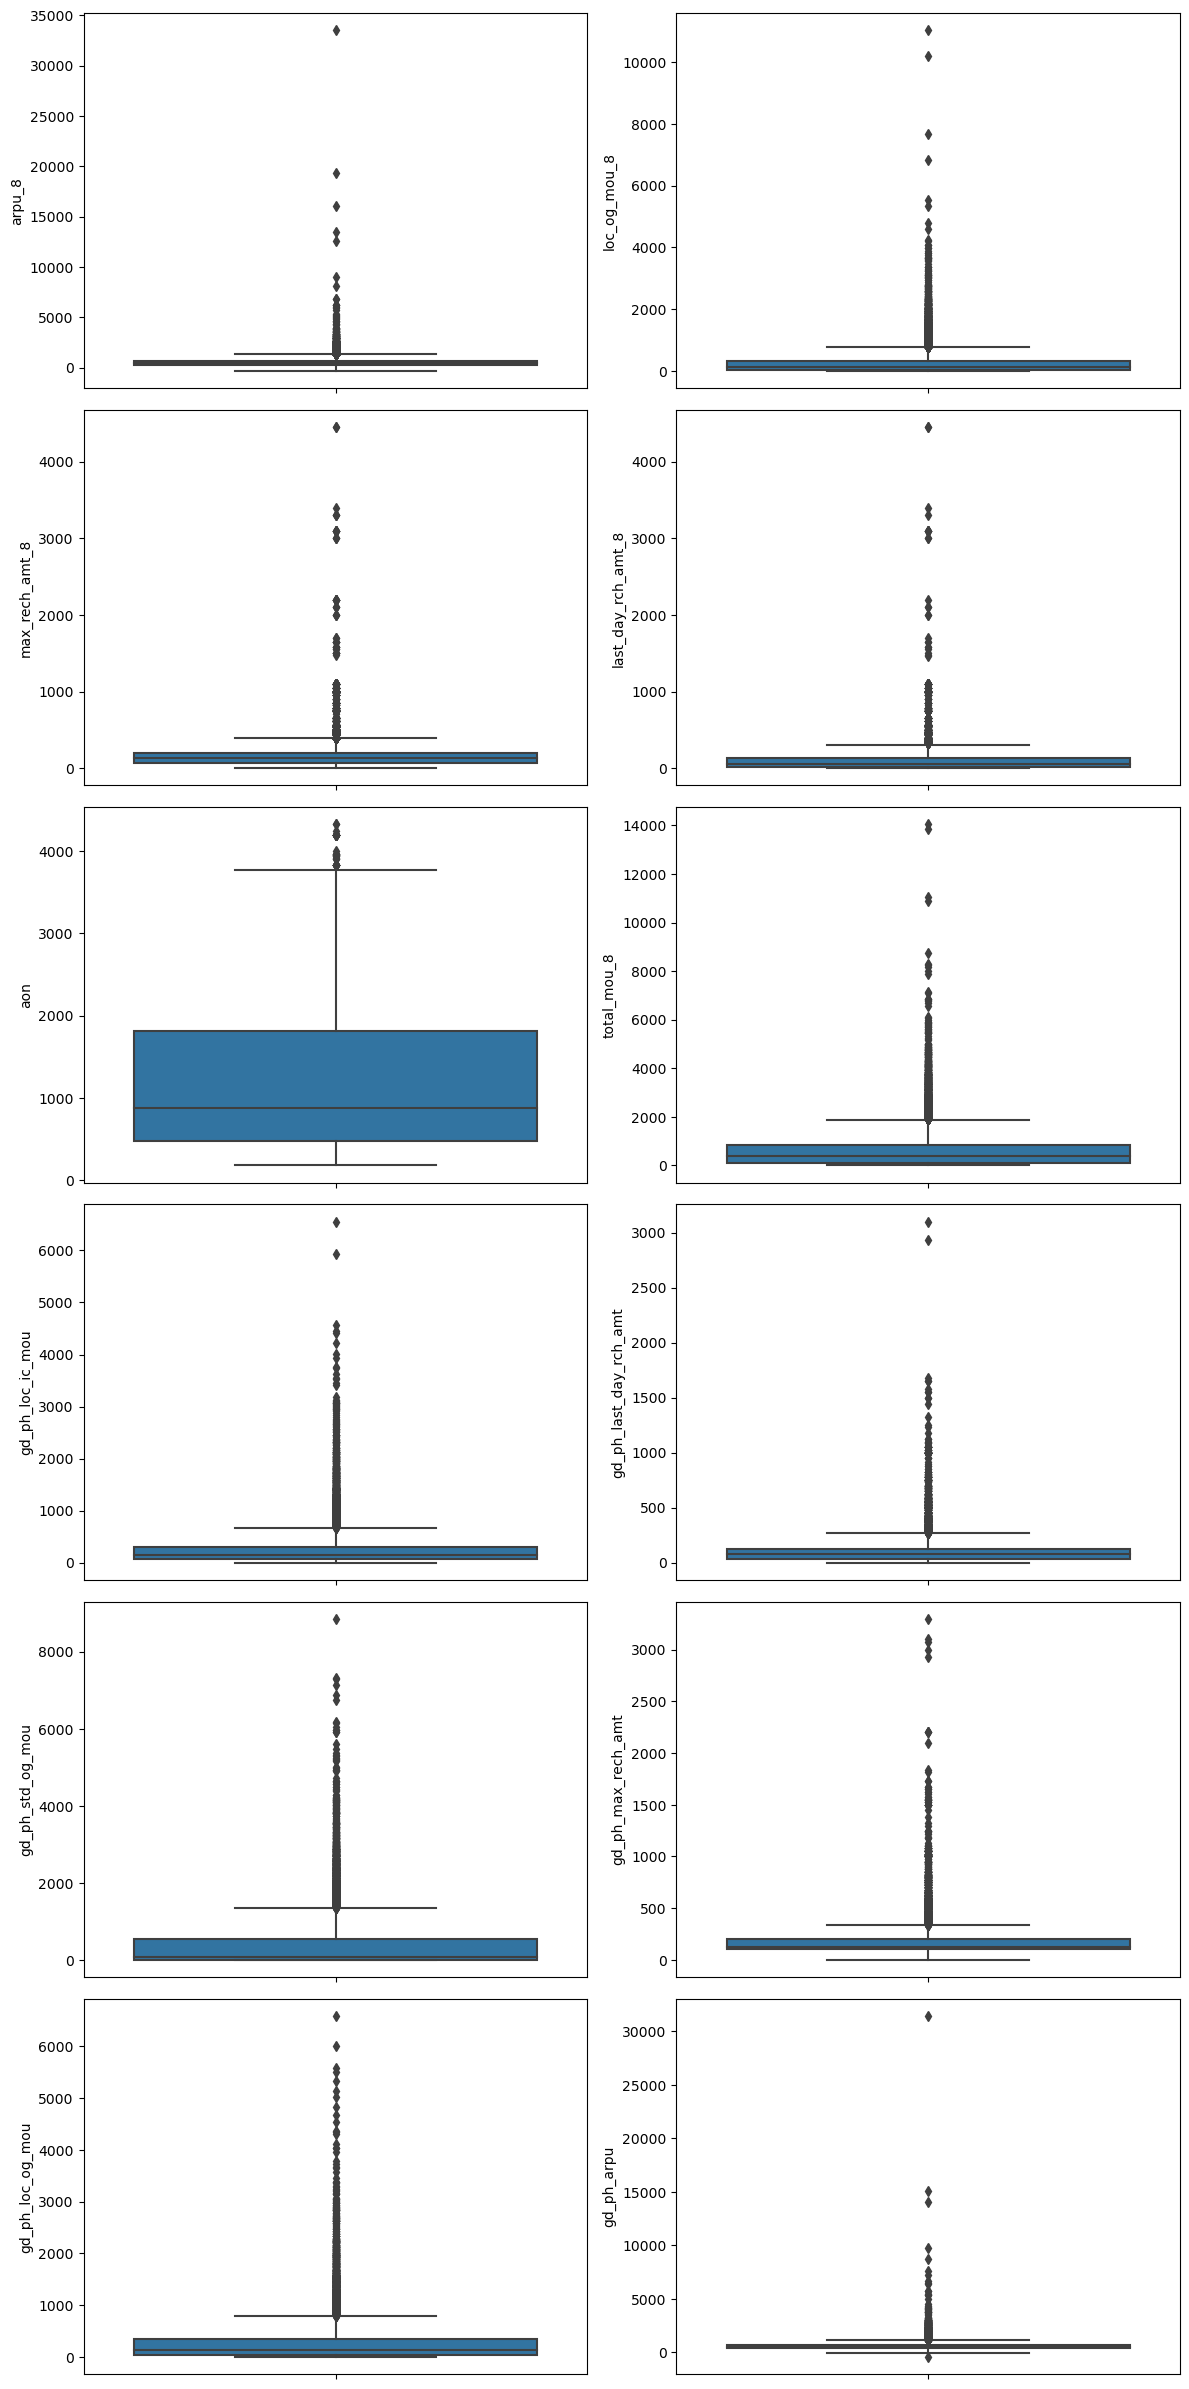

In [184]:
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

columns_per_row = 2

num_rows = (len(col_boxplot) + columns_per_row - 1) // columns_per_row

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(12, 4*num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column in col_boxplot and create a box plot
for i, col in enumerate(col_boxplot):
    sns.boxplot(data=df, y=col, ax=axes[i])

# Remove any unused subplots
for j in range(len(col_boxplot), len(axes)):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()
plt.show()



A significant amount of Outliers are present in the mentioned columns.

#### EDA

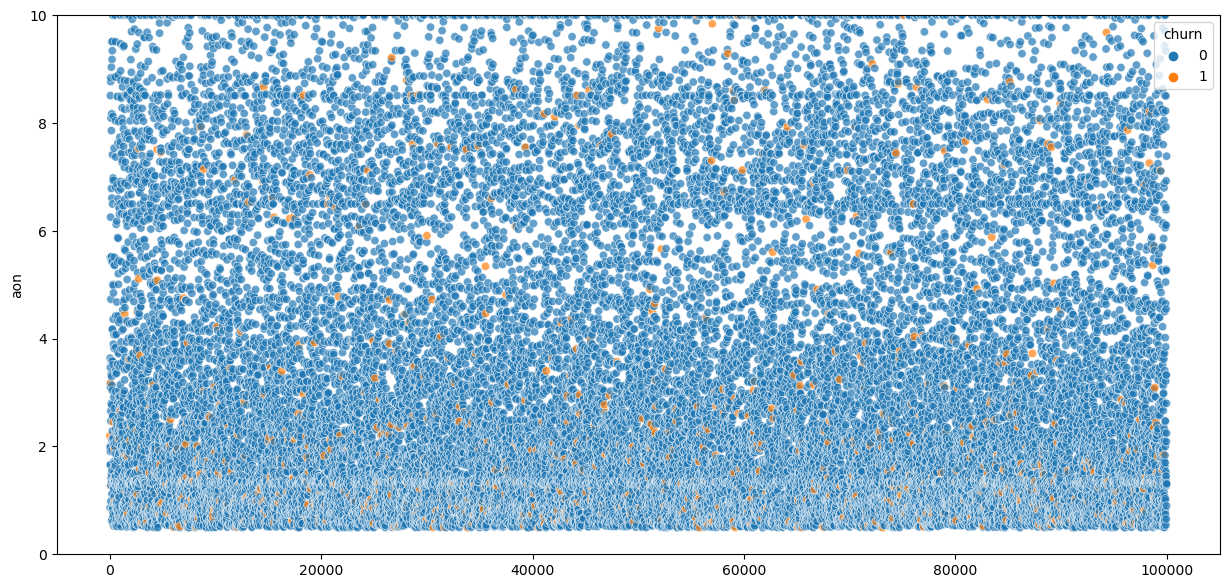

In [185]:
# Churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=df['aon'] / 365, x=df.index, hue=df.churn, alpha=0.7)
plt.ylim(0,10)
plt.show()

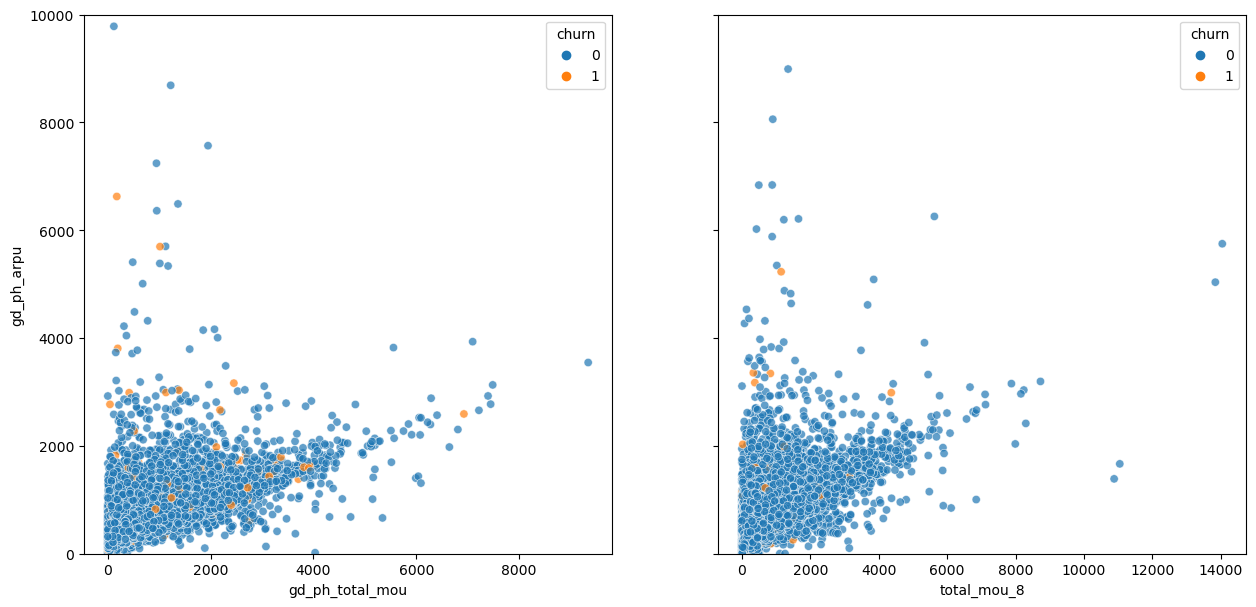

In [186]:
# VBC - revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=df, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=df, ax=axes[1], hue='churn', alpha=0.7)

plt.ylim(0,10000)
plt.show()

Churners in the 8th month show a significant drop in MOU, impacting revenue. Interestingly, despite MOU ranging from 0-2000, the revenue is highest in this range, indicating additional services that contribute to revenue.

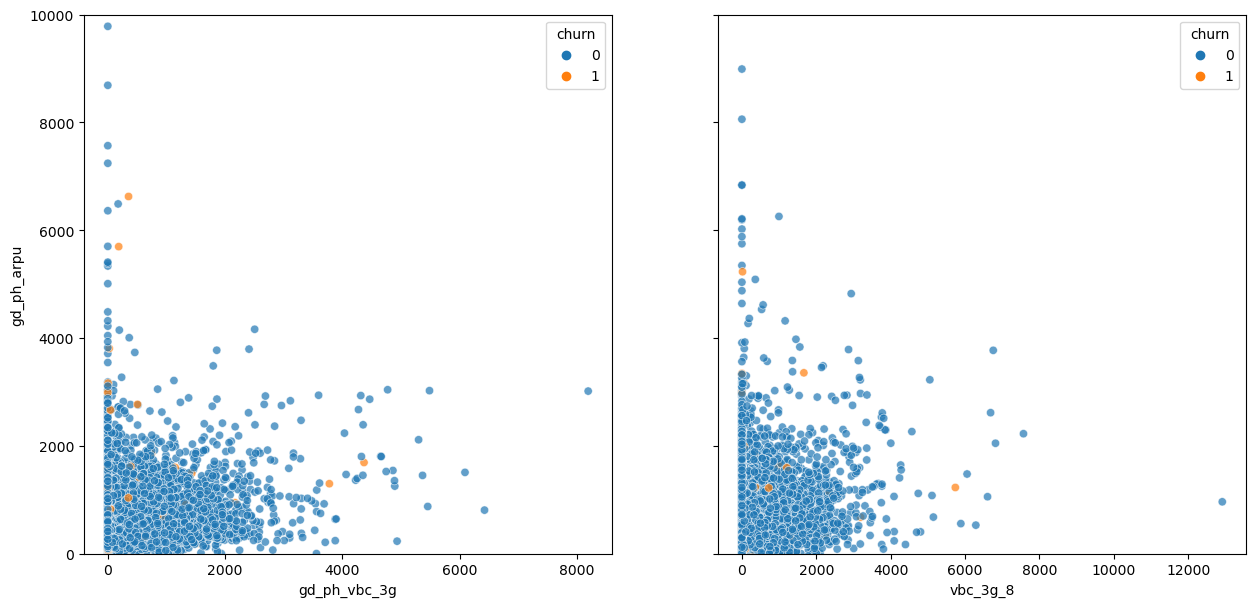

In [187]:
# The total_mou and the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=df, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=df, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

Users with low VBC data usage but high revenue churned. The trend continues with higher revenue on the lower consumption side.

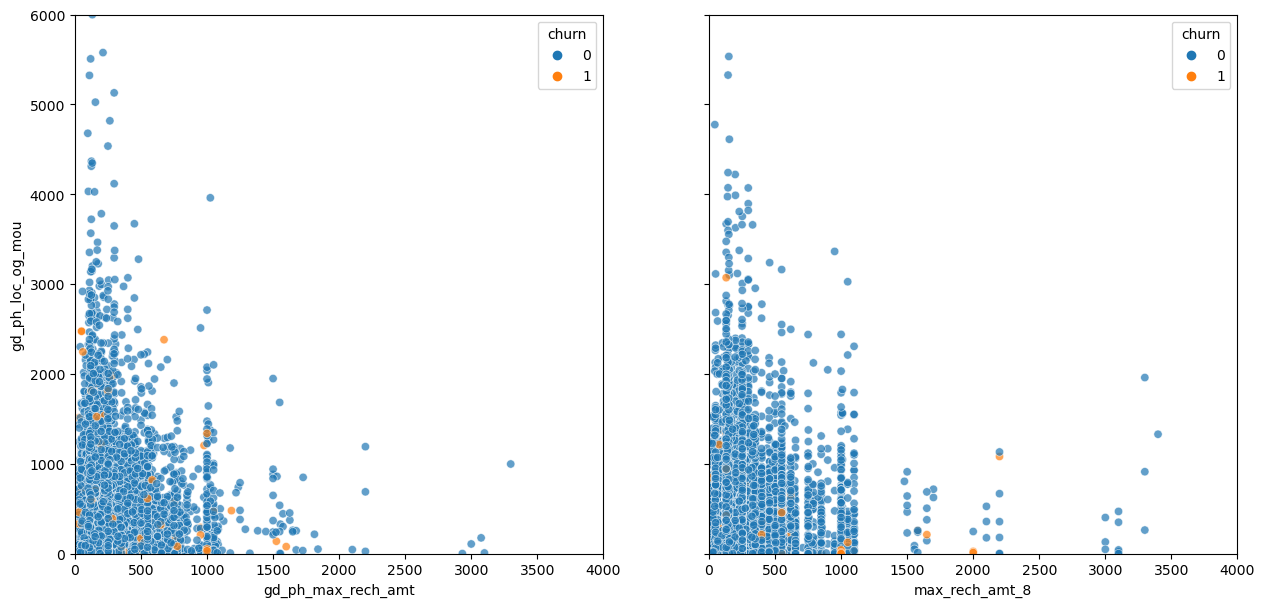

In [188]:
# Relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_loc_og_mou', data=df, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=df, ax=axes[1], hue='churn', alpha=0.7)

axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

Users who made higher recharge amounts utilized local services less compared to those who made lower recharge amounts. Interestingly, users with lower maximum recharge amounts and lower local outgoing calls during the good phase experienced higher churn rates.

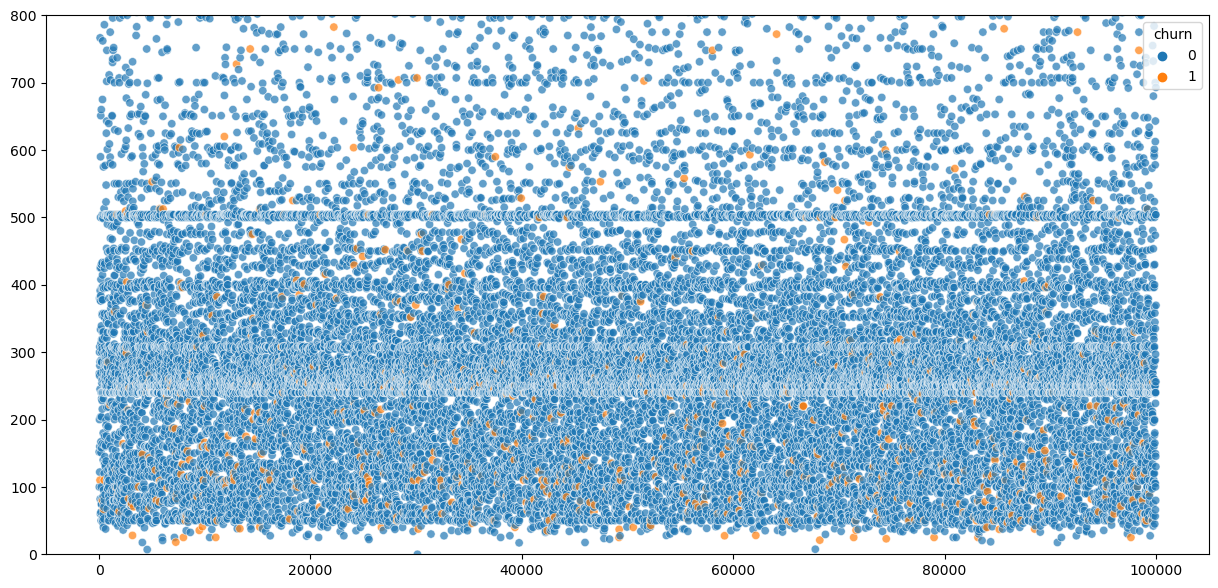

In [189]:
# max recharge and churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=df.index, y=df['gd_ph_max_rech_amt'] + df['max_rech_amt_8'],
                hue=df['churn'], alpha=0.7)
plt.ylim(0,800)
plt.show()

It is observed that users who had the max recharge amount less tha 200 churned more

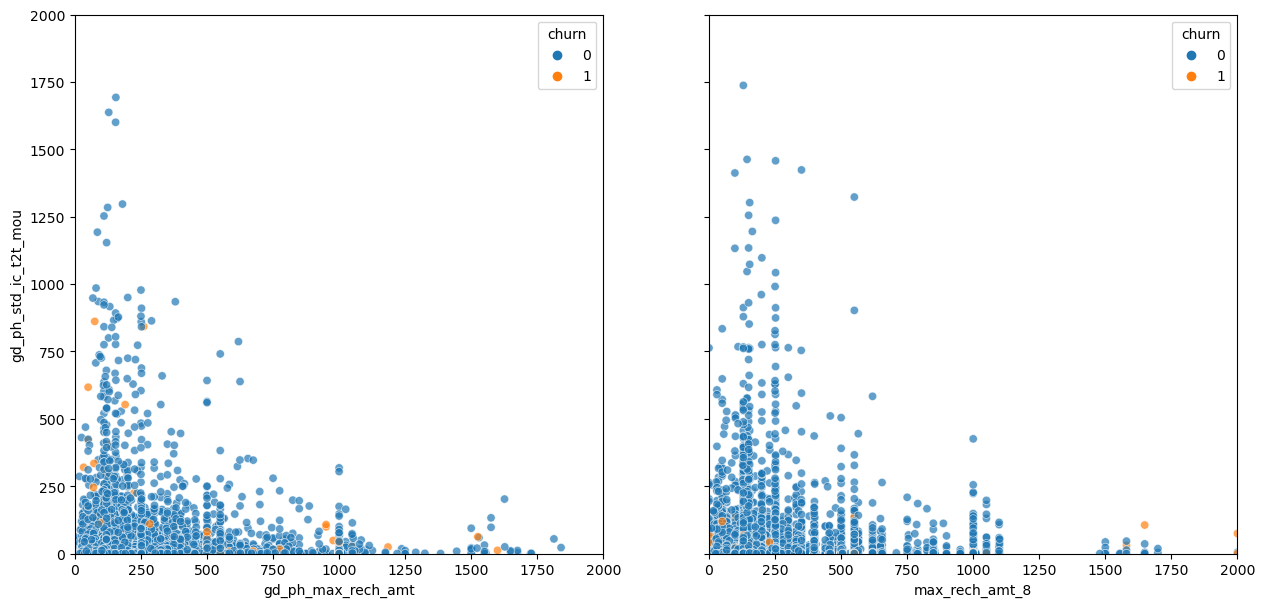

In [190]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=df, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=df, ax=axes[1], hue='churn', alpha=0.7)

axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

High max recharge, low incoming call MOU during good phase led to higher churn.

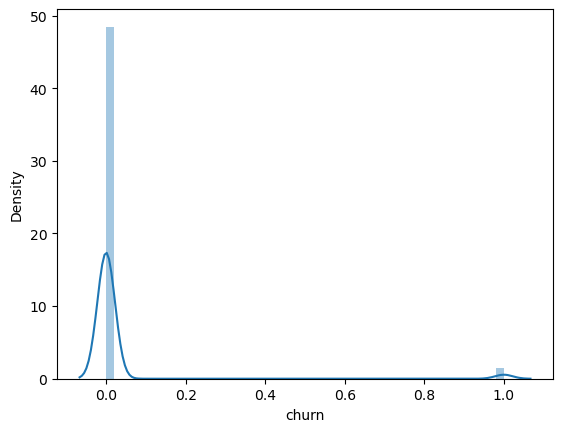

In [191]:
# Distribution of target variable

sns.distplot(df['churn'])
plt.show()

Despite the variable not being skewed, it exhibits a significant class imbalance, with approximately 94% of the dataset representing non-churners. To address this imbalance, we will employ the SMOTE algorithm.

#### Data Preparation

In [192]:
# Adressing the outliers

col_upr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    df[col] = df[col].apply(lambda x : x if x < value else value)

df[col_boxplot].head()

arpu_8  loc_og_mou_8  max_rech_amt_8  last_day_rch_amt_8   aon  \
7   3171.480        255.79            1000                 779   802   
8    137.362         63.04              30                  10   315   
21   637.760        129.74              50                  50   720   
23   366.966        182.14             179                   0   604   
33   409.230          0.00             455                 455  1328   

    total_mou_8  gd_ph_loc_ic_mou  gd_ph_last_day_rch_amt  gd_ph_std_og_mou  \
7        378.20           391.555                     0.0            68.000   
8        171.56            52.630                    25.0           136.870   
21      1068.53           106.505                    25.0           848.990   
23       239.47           145.520                    89.5             4.355   
33         0.00             2.180                   126.0             0.000   

    gd_ph_max_rech_amt  gd_ph_loc_og_mou  gd_ph_arpu  
7               1185.0           478.035   1209.5150  
8                122.0           333.135    435.4720  
21                50.0            95.565    556.1030  
23                89.5           132.795    134.1235  
33               753.5             0.000   1669.9265

In [193]:
y = df['churn']
X = df.drop('churn', axis=1)

In [194]:
# Standardization

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [195]:
# Dealing with Class Imbalance

df.churn.value_counts()

0    27295
1      868
Name: churn, dtype: int64

In [196]:
# Using SMOTE for class imbalance

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [197]:
y_res.value_counts()

1    27295
0    27295
Name: churn, dtype: int64

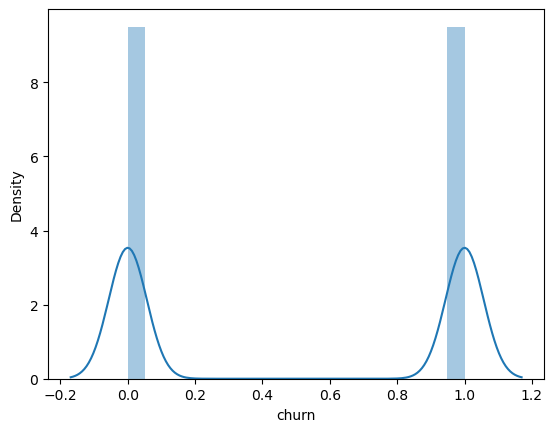

In [198]:
sns.distplot(y_res)
plt.show()

In [199]:
X.shape

(28163, 55)

In [200]:
# Performing Principal Component Analysis to reduce dimensions

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(54590, 25)

#### Model Building

#### 1. Logistic Regression

In [201]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [202]:
# Initial logistic regression model
import statsmodels.api as sm

# Initial logistic regression model
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logm1_fit = logm1.fit()
logm1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38157
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17495.
Date:                Tue, 20 Jun 2023   Deviance:                       34989.
Time:                        15:39:12   Pearson chi2:                 1.39e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3754
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.4263      0.022    -64.034      0.000      -1.470      -1.383
arpu_8                     0.4480      0.049      9.143      0.000       0.352       0.544
roam_ic_mou_8             -0.4067      0.034    -12.125      0.000      -0.472      -0.341
roam_og_mou_8             -0.0466      0.033     -1.415      0.157      -0.111       0.018
loc_og_t2c_mou_8           0.0717      0.024      3.032      0.002       0.025       0.118
loc_og_mou_8              -0.3651      0.093     -3.938      0.000      -0.547      -0.183
std_og_t2f_mou_8          -0.1397      0.041     -3.389      0.001      -0.221      -0.059
std_og_mou_8              -0.0983      0.131     -0.750      0.453      -0.355       0.158
isd_og_mou_8              -0.2239      0.069     -3.243      0.001      -0.359      -0.089
spl_og_mou_8              -0.1959      0.035     -5.623      0.000      -0.264      -0.128
og_others_8                0.0873      0.024      3.681      0.000       0.041       0.134
loc_ic_mou_8              -1.6866      0.059    -28.677      0.000      -1.802      -1.571
std_ic_t2t_mou_8          -0.5831      0.065     -8.985      0.000      -0.710      -0.456
std_ic_t2f_mou_8          -0.0224      0.040     -0.566      0.572      -0.100       0.055
std_ic_mou_8              -0.1598      0.045     -3.583      0.000      -0.247      -0.072
spl_ic_mou_8              -0.2152      0.021    -10.012      0.000      -0.257      -0.173
isd_ic_mou_8              -0.1573      0.028     -5.596      0.000      -0.212      -0.102
ic_others_8                0.1748      0.032      5.529      0.000       0.113       0.237
total_rech_num_8          -0.4986      0.034    -14.620      0.000      -0.565      -0.432
max_rech_amt_8             0.1899      0.024      7.817      0.000       0.142       0.238
last_day_rch_amt_8        -0.5462      0.022    -25.311      0.000      -0.589      -0.504
vol_2g_mb_8               -0.2947      0.030     -9.743      0.000      -0.354      -0.235
monthly_2g_8              -0.5893      0.028    -20.864      0.000      -0.645      -0.534
sachet_2g_8               -0.6012      0.030    -19.878      0.000      -0.661      -0.542
monthly_3g_8              -0.9116      0.038    -24.171      0.000      -0.986      -0.838
sachet_3g_8               -0.3841      0.035    -10.977      0.000      -0.453      -0.316
aon                       -0.3977      0.017    -24.089      0.000      -0.430      -0.365
total_mou_8               -0.7591      0.146     -5.209      0.000      -1.045      -0.474
gd_ph_og_others           -0.1127      0.031     -3.664      0.000      -0.173      -0.052
gd_ph_total_mou           -1.8380      0.401     -4.587      0.000      -2.623      -1.053
gd_ph_vol_2g_mb            0.2668      0.023     11.701      0.000       0.222  

In [203]:
# Feature selection using RFE
# Create LR object
logreg = LogisticRegression(solver='liblinear')

# Run RFE for 25 features
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [204]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'total_mou_8',
       'gd_ph_total_mou', 'gd_ph_vol_2g_mb', 'gd_ph_roam_og_mou',
       'gd_ph_loc_ic_mou', 'gd_ph_sachet_3g', 'gd_ph_monthly_3g',
       'gd_ph_total_rech_num', 'gd_ph_loc_og_mou', 'gd_ph_std_og_mou'],
      dtype='object')

In [205]:
# Building model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38187
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17764.
Date:                Tue, 20 Jun 2023   Deviance:                       35528.
Time:                        15:39:38   Pearson chi2:                 1.92e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3665
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3573      0.021    -63.458      0.000      -1.399      -1.315
arpu_8                   0.3533      0.033     10.825      0.000       0.289       0.417
roam_ic_mou_8           -0.3624      0.026    -14.202      0.000      -0.412      -0.312
loc_og_mou_8            -0.2828      0.047     -6.008      0.000      -0.375      -0.191
loc_ic_mou_8            -1.7448      0.058    -30.105      0.000      -1.858      -1.631
std_ic_t2t_mou_8        -0.3962      0.042     -9.417      0.000      -0.479      -0.314
spl_ic_mou_8            -0.2286      0.021    -10.804      0.000      -0.270      -0.187
total_rech_num_8        -0.5703      0.032    -17.630      0.000      -0.634      -0.507
max_rech_amt_8           0.2382      0.022     10.779      0.000       0.195       0.282
last_day_rch_amt_8      -0.5497      0.021    -26.072      0.000      -0.591      -0.508
vol_2g_mb_8             -0.2671      0.030     -8.989      0.000      -0.325      -0.209
monthly_2g_8            -0.6972      0.025    -27.787      0.000      -0.746      -0.648
sachet_2g_8             -0.4703      0.023    -20.526      0.000      -0.515      -0.425
monthly_3g_8            -0.9591      0.036    -26.835      0.000      -1.029      -0.889
sachet_3g_8             -0.4200      0.035    -11.884      0.000      -0.489      -0.351
aon                     -0.3985      0.016    -24.794      0.000      -0.430      -0.367
total_mou_8             -0.8328      0.037    -22.587      0.000      -0.905      -0.761
gd_ph_total_mou         -0.8290      0.203     -4.078      0.000      -1.227      -0.431
gd_ph_vol_2g_mb          0.2244      0.020     11.169      0.000       0.185       0.264
gd_ph_roam_og_mou        0.3068      0.033      9.295      0.000       0.242       0.371
gd_ph_loc_ic_mou         0.8521      0.040     21.334      0.000       0.774       0.930
gd_ph_sachet_3g          0.2044      0.022      9.505      0.000       0.162       0.247
gd_ph_monthly_3g         0.2872      0.023     12.505      0.000       0.242       0.332
gd_ph_total_rech_num     0.3806      0.024     15.949      0.000       0.334       0.427
gd_ph_loc_og_mou         0.7534      0.113      6.663      0.000       0.532       0.975
gd_ph_std_og_mou         1.0200      0.179      5.697      0.000       0.669       1.371
========================================================================================
"""

In [206]:
# Prediction on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      1    0.543166          1
1      1    0.789861          1
2      1    0.964418          1
3      0    0.118026          0
4      0    0.848026          1

In [207]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {round(100*metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted),4)}%')

[[14754  4326]
 [ 3450 15683]]

Accuracy : 79.6509%


In [208]:
# Variance Inflation Factor
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
16       gd_ph_total_mou  91.27
24      gd_ph_std_og_mou  82.36
23      gd_ph_loc_og_mou  24.76
15           total_mou_8   4.40
2           loc_og_mou_8   4.33
0                 arpu_8   4.28
3           loc_ic_mou_8   3.76
19      gd_ph_loc_ic_mou   3.40
6       total_rech_num_8   3.30
18     gd_ph_roam_og_mou   3.01
7         max_rech_amt_8   2.65
22  gd_ph_total_rech_num   2.45
8     last_day_rch_amt_8   1.98
12          monthly_3g_8   1.93
9            vol_2g_mb_8   1.84
21      gd_ph_monthly_3g   1.82
13           sachet_3g_8   1.70
20       gd_ph_sachet_3g   1.65
17       gd_ph_vol_2g_mb   1.62
11           sachet_2g_8   1.42
10          monthly_2g_8   1.27
14                   aon   1.23
1          roam_ic_mou_8   1.12
5           spl_ic_mou_8   1.04
4       std_ic_t2t_mou_8   1.03

In [209]:
# Dropping features with high VIF
rfe_col = rfe_col.drop('gd_ph_total_mou', 1)

In [210]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38188
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17773.
Date:                Tue, 20 Jun 2023   Deviance:                       35545.
Time:                        15:39:39   Pearson chi2:                 2.10e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3663
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3523      0.021    -63.404      0.000      -1.394      -1.311
arpu_8                   0.3185      0.032     10.022      0.000       0.256       0.381
roam_ic_mou_8           -0.3582      0.025    -14.066      0.000      -0.408      -0.308
loc_og_mou_8            -0.2759      0.047     -5.878      0.000      -0.368      -0.184
loc_ic_mou_8            -1.7389      0.058    -30.062      0.000      -1.852      -1.626
std_ic_t2t_mou_8        -0.3951      0.042     -9.406      0.000      -0.477      -0.313
spl_ic_mou_8            -0.2291      0.021    -10.822      0.000      -0.271      -0.188
total_rech_num_8        -0.5567      0.032    -17.294      0.000      -0.620      -0.494
max_rech_amt_8           0.2384      0.022     10.811      0.000       0.195       0.282
last_day_rch_amt_8      -0.5450      0.021    -25.911      0.000      -0.586      -0.504
vol_2g_mb_8             -0.2654      0.030     -8.945      0.000      -0.324      -0.207
monthly_2g_8            -0.6956      0.025    -27.725      0.000      -0.745      -0.646
sachet_2g_8             -0.4728      0.023    -20.642      0.000      -0.518      -0.428
monthly_3g_8            -0.9503      0.036    -26.666      0.000      -1.020      -0.880
sachet_3g_8             -0.4173      0.035    -11.832      0.000      -0.486      -0.348
aon                     -0.3968      0.016    -24.708      0.000      -0.428      -0.365
total_mou_8             -0.8211      0.037    -22.388      0.000      -0.893      -0.749
gd_ph_vol_2g_mb          0.2221      0.020     11.069      0.000       0.183       0.261
gd_ph_roam_og_mou        0.1902      0.016     11.806      0.000       0.159       0.222
gd_ph_loc_ic_mou         0.8502      0.040     21.295      0.000       0.772       0.928
gd_ph_sachet_3g          0.2032      0.021      9.476      0.000       0.161       0.245
gd_ph_monthly_3g         0.2857      0.023     12.456      0.000       0.241       0.331
gd_ph_total_rech_num     0.3728      0.024     15.671      0.000       0.326       0.419
gd_ph_loc_og_mou         0.3118      0.032      9.686      0.000       0.249       0.375
gd_ph_std_og_mou         0.2980      0.022     13.364      0.000       0.254       0.342
========================================================================================
"""

In [211]:
# Predicting on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      1    0.542628          1
1      1    0.790579          1
2      1    0.964369          1
3      0    0.116685          0
4      0    0.847418          1

In [212]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

print(f'Accuracy : {round(100*metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted),4)}%')

[[14752  4328]
 [ 3458 15675]]

Accuracy : 79.6247%


In [213]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
15           total_mou_8  4.39
2           loc_og_mou_8  4.33
0                 arpu_8  4.17
3           loc_ic_mou_8  3.75
18      gd_ph_loc_ic_mou  3.40
22      gd_ph_loc_og_mou  3.33
6       total_rech_num_8  3.28
7         max_rech_amt_8  2.65
23      gd_ph_std_og_mou  2.45
21  gd_ph_total_rech_num  2.44
8     last_day_rch_amt_8  1.98
12          monthly_3g_8  1.92
9            vol_2g_mb_8  1.84
20      gd_ph_monthly_3g  1.82
13           sachet_3g_8  1.70
19       gd_ph_sachet_3g  1.65
16       gd_ph_vol_2g_mb  1.62
11           sachet_2g_8  1.42
10          monthly_2g_8  1.27
14                   aon  1.23
17     gd_ph_roam_og_mou  1.16
1          roam_ic_mou_8  1.12
5           spl_ic_mou_8  1.04
4       std_ic_t2t_mou_8  1.03

In [214]:
# Dropping features
rfe_col = rfe_col.drop('total_mou_8', 1)

In [215]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38189
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18055.
Date:                Tue, 20 Jun 2023   Deviance:                       36110.
Time:                        15:39:41   Pearson chi2:                 1.16e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3568
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3460      0.021    -62.748      0.000      -1.388      -1.304
arpu_8                  -0.0008      0.027     -0.030      0.976      -0.054       0.052
roam_ic_mou_8           -0.3312      0.025    -13.461      0.000      -0.379      -0.283
loc_og_mou_8            -0.5457      0.045    -12.173      0.000      -0.634      -0.458
loc_ic_mou_8            -1.8187      0.058    -31.140      0.000      -1.933      -1.704
std_ic_t2t_mou_8        -0.4522      0.043    -10.551      0.000      -0.536      -0.368
spl_ic_mou_8            -0.2314      0.021    -10.953      0.000      -0.273      -0.190
total_rech_num_8        -0.8164      0.031    -26.320      0.000      -0.877      -0.756
max_rech_amt_8           0.2983      0.022     13.771      0.000       0.256       0.341
last_day_rch_amt_8      -0.5565      0.021    -26.624      0.000      -0.597      -0.515
vol_2g_mb_8             -0.2538      0.030     -8.560      0.000      -0.312      -0.196
monthly_2g_8            -0.6726      0.025    -26.643      0.000      -0.722      -0.623
sachet_2g_8             -0.4341      0.023    -18.805      0.000      -0.479      -0.389
monthly_3g_8            -0.8810      0.036    -24.782      0.000      -0.951      -0.811
sachet_3g_8             -0.3581      0.035    -10.120      0.000      -0.427      -0.289
aon                     -0.3849      0.016    -24.061      0.000      -0.416      -0.354
gd_ph_vol_2g_mb          0.2070      0.020     10.330      0.000       0.168       0.246
gd_ph_roam_og_mou        0.1548      0.015     10.051      0.000       0.125       0.185
gd_ph_loc_ic_mou         0.9286      0.040     22.957      0.000       0.849       1.008
gd_ph_sachet_3g          0.1705      0.021      7.973      0.000       0.129       0.212
gd_ph_monthly_3g         0.2910      0.023     12.687      0.000       0.246       0.336
gd_ph_total_rech_num     0.5556      0.023     24.357      0.000       0.511       0.600
gd_ph_loc_og_mou         0.2826      0.032      8.747      0.000       0.219       0.346
gd_ph_std_og_mou        -0.0339      0.015     -2.232      0.026      -0.064      -0.004
========================================================================================
"""

In [216]:
# Predicting on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      1    0.466016          0
1      1    0.797215          1
2      1    0.899932          1
3      0    0.141638          0
4      0    0.832749          1

In [217]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

print(f'Accuracy : {round(100*metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted),4)}%')

[[14495  4585]
 [ 3381 15752]]

Accuracy : 79.1537%


In [218]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           loc_og_mou_8  3.85
3           loc_ic_mou_8  3.75
17      gd_ph_loc_ic_mou  3.40
0                 arpu_8  3.35
21      gd_ph_loc_og_mou  3.32
6       total_rech_num_8  2.87
7         max_rech_amt_8  2.62
20  gd_ph_total_rech_num  2.22
8     last_day_rch_amt_8  1.98
12          monthly_3g_8  1.89
9            vol_2g_mb_8  1.84
19      gd_ph_monthly_3g  1.82
13           sachet_3g_8  1.68
18       gd_ph_sachet_3g  1.64
15       gd_ph_vol_2g_mb  1.62
22      gd_ph_std_og_mou  1.58
11           sachet_2g_8  1.41
10          monthly_2g_8  1.27
14                   aon  1.23
16     gd_ph_roam_og_mou  1.16
1          roam_ic_mou_8  1.12
5           spl_ic_mou_8  1.04
4       std_ic_t2t_mou_8  1.03

The VIF values are below 5.

In [219]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [220]:
# The sensitivity of our logistic regression model
print(round(100*(TP / float(TP+FN)),4),'%')

82.329 %


In [221]:
# Specificity
print(round(100*(TN / float(TN+FP)),4),'%')

75.9696 %


In [222]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(round(100*(FP/ float(TN+FP)),4),'%')

24.0304 %


In [223]:
# Positive predictive value 
print(round(100*(TP / float(TP+FP)),4),'%')

77.4549 %


In [224]:
# Negative predictive value
print(round(100*(TN / float(TN+ FN)),4),'%')

81.0864 %


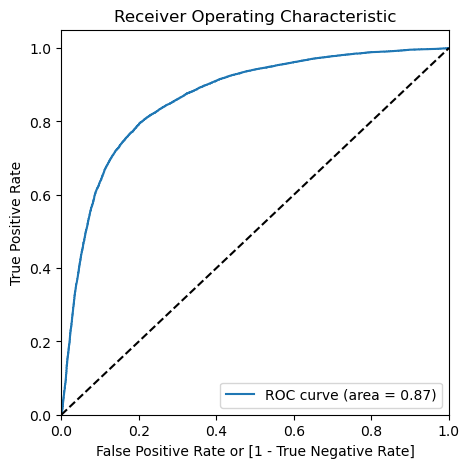

In [225]:
# ROC 
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'], drop_intermediate=False)
draw_roc(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'])


In [226]:
# Optimal cutoff
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      1    0.466016          0    1    1    1    1    1    0    0    0    0   
1      1    0.797215          1    1    1    1    1    1    1    1    1    0   
2      1    0.899932          1    1    1    1    1    1    1    1    1    1   
3      0    0.141638          0    1    1    0    0    0    0    0    0    0   
4      0    0.832749          1    1    1    1    1    1    1    1    1    1   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [227]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500693  1.000000  0.000000
0.1   0.1  0.631408  0.979982  0.281866
0.2   0.2  0.697878  0.953536  0.441509
0.3   0.3  0.745715  0.923431  0.567505
0.4   0.4  0.774789  0.878012  0.671279
0.5   0.5  0.791537  0.823290  0.759696
0.6   0.6  0.792819  0.743009  0.842767
0.7   0.7  0.763484  0.622276  0.905084
0.8   0.8  0.680318  0.408091  0.953302
0.9   0.9  0.556826  0.128312  0.986530


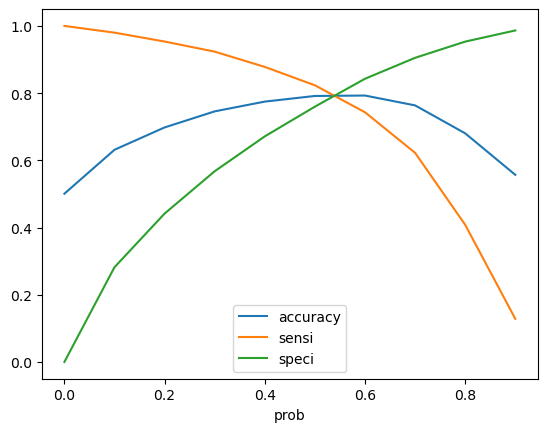

In [228]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The optimal point for our model is approx 0.5 . 

In [229]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
38017      1    0.838936          1
7994       0    0.278795          0
51540      1    0.825783          1
26903      0    0.643397          1
15570      0    0.416027          0

In [230]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The Overall accuracy.
print(f'Accuracy : {round(100*metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted),4)}%')

[[6247 1968]
 [1430 6732]]

Accuracy : 79.1537%


In [231]:
# Top 10 predictors

abs(res.params).sort_values(ascending=False)[0:11]

loc_ic_mou_8            1.818666
const                   1.345965
gd_ph_loc_ic_mou        0.928571
monthly_3g_8            0.880982
total_rech_num_8        0.816360
monthly_2g_8            0.672551
last_day_rch_amt_8      0.556456
gd_ph_total_rech_num    0.555561
loc_og_mou_8            0.545699
std_ic_t2t_mou_8        0.452208
sachet_2g_8             0.434062
dtype: float64

The top ten features affecting the model, ranked in descending order of importance, are:

- loc_ic_mou_8: 1.82
- gd_ph_loc_ic_mou: 0.93
- monthly_3g_8: 0.88
- total_rech_num_8: 0.82
- monthly_2g_8: 0.67
- last_day_rch_amt_8: 0.56
- gd_ph_total_rech_num: 0.56
- loc_og_mou_8: 0.55
- std_ic_t2t_mou_8: 0.45
- sachet_2g_8: 0.43

These features have varying degrees of impact on the model's predictions, with "loc_ic_mou_8" having the highest importance score of 1.82.

#### 2. Decision Tree

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

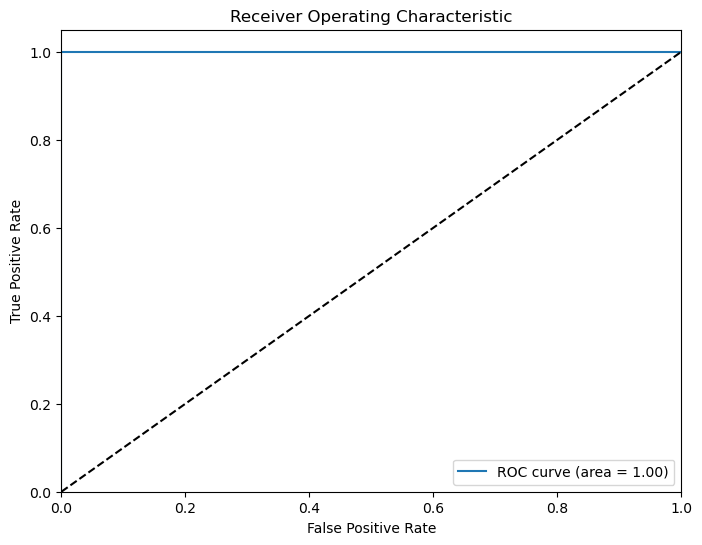

In [233]:
# Create and train the decision tree classifier
initial_dt = DecisionTreeClassifier()
initial_dt.fit(X_train, y_train)

# Get predicted probabilities
y_probs = initial_dt.predict_proba(X_train)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [234]:
# Hyperparameter Tuning

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [235]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

print("GridSearchCV Results:")
print(grid_search.cv_results_)

dt_best = grid_search.best_estimator_
dt_best

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1}
Best Accuracy Score: 0.882945708550039
GridSearchCV Results:
{'mean_fit_time': array([0.3223905 , 0.32789057, 0.32277125, 0.32614386, 0.31330121,
       0.31884259, 0.46802491, 0.45912254, 0.45057732, 0.45933276,
       0.44584078, 0.48213792, 0.72728431, 0.68451357, 0.68102896,
       0.71378851, 0.73628718, 0.73504055, 1.15763795, 1.177939  ,
       1.18030304, 1.18967396, 1.07424021, 0.99558663, 1.69881606,
       1.63167566, 1.55464333, 1.39440745, 1.256212  , 1.09560603,
       1.84157157, 1.65518945, 1.60074472, 1.42856133, 1.23617893,
       1.07921618, 1.90218067, 1.68675113, 1.56508368, 1.40252459,
       1.26934868, 1.1020599 , 2.00500673, 1.73189354, 1.60023332,
       1.40741527, 1.25067186, 1.09815902, 1.89211017, 1.65949607,
       1.55759948, 1.39853179, 1.07876611, 0.91602963]), 'std_fit_time': array([0.00683836, 0.00852211, 0.0027026 , 0.01231986, 0.00896626,
       0.01031709, 0.0173699 , 0.01543317, 0.01361976

DecisionTreeClassifier(max_depth=30, random_state=42)

In [236]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Printing the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      8215
           1       0.87      0.92      0.90      8162

    accuracy                           0.89     16377
   macro avg       0.89      0.89      0.89     16377
weighted avg       0.89      0.89      0.89     16377



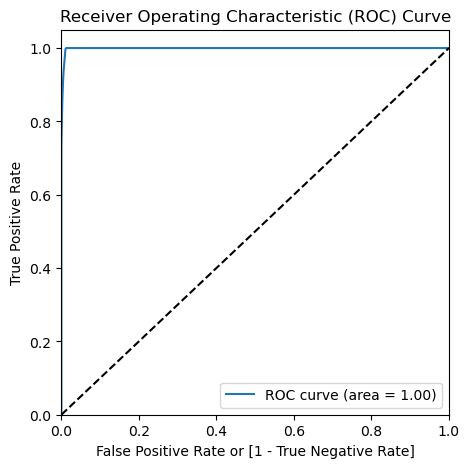

In [237]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [238]:
y_pred = best_dt.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",(accuracy*100),"%")


Accuracy: 88.92959638517432 %


Accuracy of The Decision Tree model is nearly 90%


#### 3. Random Forest

Train accuracy : 0.8732630256718917
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      8215
           1       0.87      0.93      0.90      8162

    accuracy                           0.89     16377
   macro avg       0.90      0.89      0.89     16377
weighted avg       0.90      0.89      0.89     16377



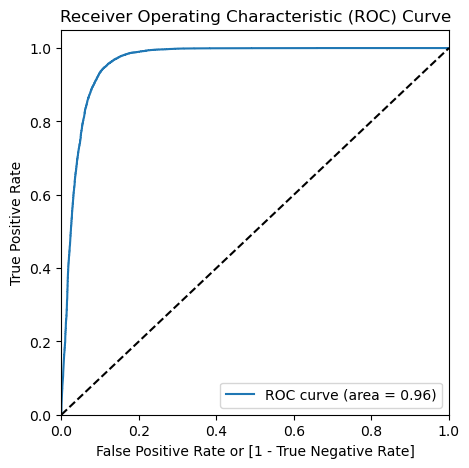

In [239]:
rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [240]:
# Hyperparameter Tuning

rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [241]:
print(grid_search.best_score_)

print("********")
rf_best = grid_search.best_estimator_
print(rf_best)
print("********")
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

0.9414859008217895
********
RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)
********
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8215
           1       0.94      0.97      0.95      8162

    accuracy                           0.95     16377
   macro avg       0.95      0.95      0.95     16377
weighted avg       0.95      0.95      0.95     16377



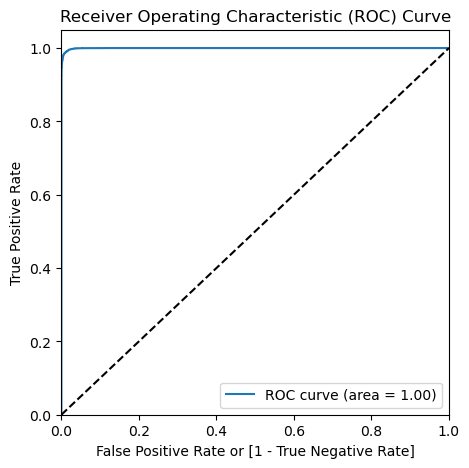

In [242]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [243]:
y_pred = rf_best.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",(accuracy*100),"%")

Accuracy: 95.24943518348904 %


The Accuracy for Random Forest is highest i.e. 95.2 %. Therefore, selecting Random Forest for Final prediction model.

In [244]:
# Selecting Random Forest for final prediction model

final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1, random_state=25)

y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Printing the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19080
           1       0.98      0.99      0.99     19133

    accuracy                           0.99     38213
   macro avg       0.99      0.99      0.99     38213
weighted avg       0.99      0.99      0.99     38213

Report on test data
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8215
           1       0.94      0.97      0.95      8162

    accuracy                           0.95     16377
   macro avg       0.95      0.95      0.95     16377
weighted avg       0.95      0.95      0.95     16377



#### Conclusion


1. Users with consistently low maximum recharge amounts, even during the good phase, should be closely monitored as they exhibit a higher likelihood of churning. Regular evaluation and targeted interventions are essential to retain these customers.

2. Customers who have been associated with the network for less than 4 years require continuous monitoring. Historical data indicates that users in this category are more prone to churning. By keeping a close eye on their behavior and preferences, we can take proactive measures to prevent attrition.

3. While minutes of usage (MOU) is a significant factor, it is crucial to consider additional metrics such as VBC (Volume-based Charging) for users who do not have an active data pack. Identifying such users and understanding their data usage patterns can provide valuable insights for retention strategies.

4. Considering our business objective of customer retention, achieving higher recall is of utmost importance. By focusing on correctly identifying true positives, we can minimize the risk of losing valuable customers. Offering incentives and personalized offers to customers who show early signs of potential churn can be a cost-effective approach compared to acquiring new customers.